!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

연속형 임의의 데이터 생성

In [ ]:
np.random.seed(0)
# 정규분포 생성
Temperature = np.random.normal(30,3,100)
IceAmericano = Temperature + np.random.normal(100,8,100)

데이터 프레임 형태로 2개 데이터 합치기<br>

In [ ]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano
})

In [ ]:
Data.head()

,Temp,Sales
0,35.292157,150.357363
1,31.200472,120.418399
2,32.936214,122.772334
3,36.722680,144.477853
4,35.602674,126.217687


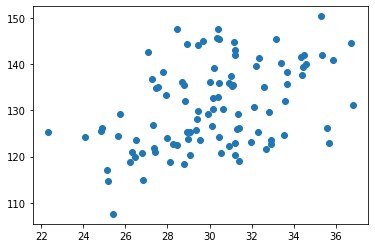

In [ ]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.show()

선형회귀 모델, 딥러닝 framework (keras)로 만들기

In [ ]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.5))

In [ ]:
model.fit(x=Data[['Temp']], y=Data[['Sales']], epochs=50, shuffle=True)

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 12430.9805
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 2751.1506
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 227.6820
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1222.1974
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1670.1036
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 882.8502
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 240.9971
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 209.1930
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 358.9735
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 304.6247
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 172.3298
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 157.1700
Epoch 13/50
4/4 [===========================

In [ ]:
model.predict(Data[['Temp']])

4/4 [==============================] - 0s 2ms/step


array([[152.20499 ],
       [135.3671  ],
       [142.50993 ],
       [158.0918  ],
       [153.4828  ],
       [118.36204 ],
       [142.15623 ],
       [128.55841 ],
       [129.1527  ],
       [135.496   ],
       [132.20526 ],
       [148.38063 ],
       [139.82231 ],
       [131.92911 ],
       [135.90666 ],
       [134.54634 ],
       [148.87206 ],
       [127.8942  ],
       [134.29195 ],
       [119.88278 ],
       [ 98.909164],
       [138.49619 ],
       [141.09882 ],
       [121.26461 ],
       [158.44812 ],
       [112.47218 ],
       [130.99188 ],
       [128.1161  ],
       [149.34982 ],
       [148.56686 ],
       [132.33987 ],
       [135.09555 ],
       [119.466866],
       [105.97316 ],
       [126.13184 ],
       [132.35718 ],
       [145.61546 ],
       [145.27089 ],
       [125.645256],
       [126.69491 ],
       [117.48212 ],
       [112.89622 ],
       [109.362305],
       [154.51016 ],
       [124.135086],
       [125.01875 ],
       [114.96065 ],
       [140.0

4/4 [==============================] - 0s 3ms/step


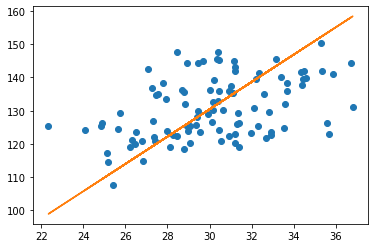

In [ ]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['Temp'], model.predict(Data[['Temp']]))
plt.show()

In [ ]:
ModelWeights = model.get_weights()
print(ModelWeights)

[array([[4.1497645]], dtype=float32), array([7.449089], dtype=float32)]


In [ ]:
# Y(sales) = 4.149 * temperature + 7.449

In [ ]:
Data.head()

,Temp,Sales
0,35.292157,150.357363
1,31.200472,120.418399
2,32.936214,122.772334
3,36.722680,144.477853
4,35.602674,126.217687


In [ ]:
Data['Temp'][0] * ModelWeights[0][0] + ModelWeights[1][0]

array([153.90323], dtype=float32)

In [ ]:
model.predict(Data[['Temp']])[0]

4/4 [==============================] - 0s 1ms/step


array([153.90323], dtype=float32)